# Práctica 6: Red neuronal para clasificación multiclase de imágenes de dígitos escritos a mano

Importar los datos

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
X = np.load('/content/drive/MyDrive/AA/p5/X.npy')
y = np.load('/content/drive/MyDrive/AA/p5/y.npy')
print(X.shape)
print(y.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(5000, 400)
(5000, 1)


Separar los datos en entrenamiento y test (70-30)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("70% de elementos de entrenamiento:")
print("Dimension tabla X_ent: ", X_train.shape, ", Dimension tabla y_ent: ", y_train.shape)
print("30% de elementos de test:")
print("Dimension tabla X_test: ", X_test.shape, ", Dimension tabla y_test: ", y_test.shape)

70% de elementos de entrenamiento:
Dimension tabla X_ent:  (3500, 400) , Dimension tabla y_ent:  (3500, 1)
30% de elementos de test:
Dimension tabla X_test:  (1500, 400) , Dimension tabla y_test:  (1500, 1)


Visualisacion de los datos

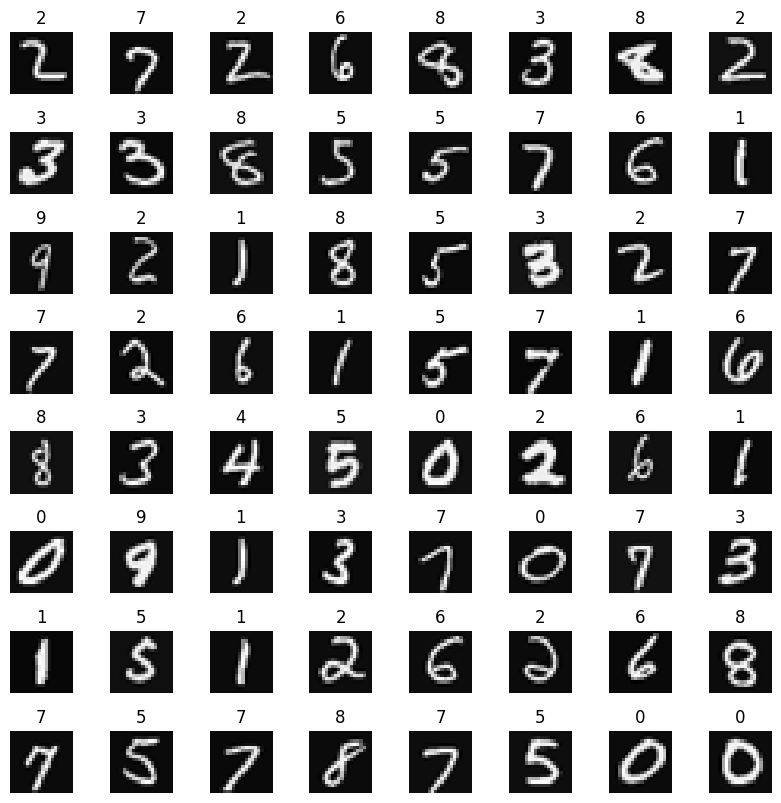

In [36]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
       
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

# Red neuronal con TensorFlow

## Entrenamiento

In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy

layer_1 = Dense(units=25 , activation="sigmoid")
layer_2 = Dense(units=15 , activation="sigmoid")
layer_3 = Dense(units=10 , activation="linear")

# 2 configuraciones de tensorflow para realizar la optimización de los parámetros
model_grad = Sequential([layer_1, layer_2, layer_3]) # neural network
model_grad.compile(loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']) # Gradient descent
model_grad.fit(X_train,y_train,epochs=100,verbose=0) # Train on data to minimize the cost function with gradient descent 

model_adam = Sequential([layer_1, layer_2, layer_3]) # neural network
model_adam.compile(optimizer=Adam(learning_rate=1e-3), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']) # Adam Optimizer 
model_adam.fit(X_train,y_train,epochs=100,verbose=0) # Train on data to minimize the cost function with gradient descent 

## Prediccion

In [38]:
test = 1500
newY_grad_softmax, newY_grad_sigmoid = np.zeros((test, 1), dtype='int64'), np.zeros((test, 1), dtype='int64') 
newY_adam_softmax, newY_adam_sigmoid = np.zeros((test, 1), dtype='int64') , np.zeros((test, 1), dtype='int64') 

for i in range (test):
  pi_adam = model_adam.predict(X_test[i].reshape(1,400), verbose = 0)   
  pi_grad = model_grad.predict(X_test[i].reshape(1,400), verbose = 0)   

  # 2 configuraciones de tensorflow para realizar clasificación multiclase
  prediction_p_grad_softmax, prediction_p_grad_sigmoid = tf.nn.softmax(pi_grad).numpy(), tf.nn.sigmoid(pi_grad).numpy()
  prediction_p_adam_softmax, prediction_p_adam_sigmoid = tf.nn.softmax(pi_adam).numpy(), tf.nn.sigmoid(pi_adam).numpy()

  yhat_grad_softmax, yhat_grad_sigmoid = np.argmax(prediction_p_grad_softmax), np.argmax(prediction_p_grad_sigmoid)
  yhat_adam_softmax, yhat_adam_sigmoid = np.argmax(prediction_p_adam_softmax), np.argmax(prediction_p_adam_sigmoid)

  newY_grad_softmax[i], newY_grad_sigmoid[i] = yhat_grad_softmax, yhat_grad_sigmoid
  newY_adam_softmax[i], newY_adam_sigmoid[i] = yhat_adam_softmax, yhat_adam_sigmoid

In [39]:
#Accuracy
from sklearn.metrics import accuracy_score
print("Training Set Accuracy:", accuracy_score(newY_grad_softmax, y_test)*100,"%")
print("Training Set Accuracy:", accuracy_score(newY_grad_sigmoid, y_test)*100,"%")
print("Training Set Accuracy:", accuracy_score(newY_adam_softmax, y_test)*100,"%")
print("Training Set Accuracy:", accuracy_score(newY_adam_sigmoid, y_test)*100,"%")

Training Set Accuracy: 93.66666666666667 %
Training Set Accuracy: 93.66666666666667 %
Training Set Accuracy: 93.66666666666667 %
Training Set Accuracy: 93.66666666666667 %
